In [452]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [453]:
BMCdata = pd.read_csv(r"D:\iiit notes\Internship\13 seasion 27_May-2021\bank-additional-full-V1.0.csv", header = 0)
BMCdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [454]:
BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [455]:
# Replace target variable 'Deposit', 'Yes' to 1 ans 'No' to 0 and 
# convert the 'y' to integer value.

BMCdata['Deposit'] = BMCdata['Deposit'].str.replace('yes', '1')
BMCdata['Deposit'] = BMCdata['Deposit'].str.replace('no', '0')
BMCdata['Deposit'] = BMCdata['Deposit'].astype(int)

In [456]:
# Count the target or dependent variable by '0' & '1' and
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

BMCdata_count = BMCdata.Deposit.value_counts()
print('Class 0:', BMCdata_count[0])
print('Class 1:', BMCdata_count[1])
print('Proportion:', round(BMCdata_count[0] / BMCdata_count[1], 2), ': 1')
print('Total CC Trans:', len(BMCdata))

Class 0: 36548
Class 1: 4640
Proportion: 7.88 : 1
Total CC Trans: 41188


In [457]:
# Displaying Duplicate values with in dataset

BMCdata_dup = BMCdata[BMCdata.duplicated(keep= 'last')]
BMCdata_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [458]:
# Remove the identified duplicate records

BMCdata = BMCdata.drop_duplicates()
BMCdata.shape

(41176, 21)

In [459]:
BMCdata = BMCdata.reset_index(drop=True)

In [460]:
BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [461]:
for i in BMCdata.columns:
    print(BMCdata[i].value_counts())

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
no         33938
yes   

In [462]:
BMCdata['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [463]:
# Replace target variable 'housing', 'Yes' to 1 ans 'No' to 0 and 
# convert the 'y' to integer value.

BMCdata['housing'] = BMCdata['housing'].str.replace('yes', '1')
BMCdata['housing'] = BMCdata['housing'].str.replace('no', '0')
BMCdata['housing'] = BMCdata['housing'].str.replace('unk0wn', '2')
BMCdata['housing'] = BMCdata['housing'].astype(int)

In [464]:
BMCdata['housing'].value_counts(sort=False)

0    18615
1    21571
2      990
Name: housing, dtype: int64

In [465]:
BMCdata['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [466]:
# Replace target variable 'loan', 'Yes' to 1 ans 'No' to 0 and 
# convert the 'y' to integer value.

BMCdata['loan'] = BMCdata['loan'].str.replace('yes', '1')
BMCdata['loan'] = BMCdata['loan'].str.replace('no', '0')
BMCdata['loan'] = BMCdata['loan'].str.replace('unk0wn', '2')
BMCdata['loan'] = BMCdata['loan'].astype(int)

In [467]:
BMCdata['loan'].value_counts(sort=False)

0    33938
1     6248
2      990
Name: loan, dtype: int64

In [468]:
BMCdata['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [469]:
del BMCdata['job']

In [470]:
BMCdata['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [471]:
BMCdata['education'] = BMCdata['education'].str.replace('illiterate', '1')
BMCdata['education'] = BMCdata['education'].str.replace('unknown', '1')
BMCdata['education'] = BMCdata['education'].str.replace('basic.4y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('basic.6y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('basic.9y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('high.school', '3')
BMCdata['education'] = BMCdata['education'].str.replace('professional.course', '4')
BMCdata['education'] = BMCdata['education'].str.replace('university.degree', '5')
BMCdata['education'] = BMCdata['education'].astype(int)

In [472]:
BMCdata['education'].value_counts(sort=False)

1     1748
2    12512
3     9512
4     5240
5    12164
Name: education, dtype: int64

In [473]:
BMCdata.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
education,2,3,3,2,3
default,no,unknown,no,no,no
housing,0,0,1,0,0
loan,0,0,0,0,1
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon
duration,261,149,226,151,307


In [474]:
BMCdata['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [475]:
BMCdata['marital'] = BMCdata['marital'].str.replace('single', '1')
BMCdata['marital'] = BMCdata['marital'].str.replace('married', '2')
BMCdata['marital'] = BMCdata['marital'].str.replace('divorced', '3')
BMCdata['marital'] = BMCdata['marital'].str.replace('unknown', '4')
BMCdata['marital'] = BMCdata['marital'].astype(int)

In [476]:
BMCdata['marital'].value_counts(sort=False)

1    11564
2    24921
3     4611
4       80
Name: marital, dtype: int64

In [477]:
BMCdata['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [478]:
BMCdata['default'] = BMCdata['default'].str.replace('yes', '1')
BMCdata['default'] = BMCdata['default'].str.replace('no', '0')
BMCdata['default'] = BMCdata['default'].str.replace('unk0wn', '2')
BMCdata['default'] = BMCdata['default'].astype(int)

In [479]:
BMCdata['default'].value_counts(sort=False)

0    32577
1        3
2     8596
Name: default, dtype: int64

In [480]:
BMCdata['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [481]:
BMCdata['contact'] = BMCdata['contact'].str.replace('telephone', '1')
BMCdata['contact'] = BMCdata['contact'].str.replace('cellular', '2')
BMCdata['contact'] = BMCdata['contact'].astype(int)

In [482]:
BMCdata['contact'].value_counts(sort=False)

1    15041
2    26135
Name: contact, dtype: int64

In [483]:
BMCdata['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [484]:
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('mon', '1')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('tue', '2')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('wed', '3')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('thu', '4')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('fri', '5')
BMCdata['day_of_week'] = BMCdata['day_of_week'].astype(int)

In [485]:
BMCdata['day_of_week'].value_counts(sort=False)

1    8512
2    8086
3    8134
4    8618
5    7826
Name: day_of_week, dtype: int64

In [486]:
BMCdata['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [487]:
BMCdata['month'] = BMCdata['month'].str.replace('mar', '3')
BMCdata['month'] = BMCdata['month'].str.replace('apr', '4')
BMCdata['month'] = BMCdata['month'].str.replace('may', '5')
BMCdata['month'] = BMCdata['month'].str.replace('jun', '6')
BMCdata['month'] = BMCdata['month'].str.replace('jul', '7')
BMCdata['month'] = BMCdata['month'].str.replace('aug', '8')
BMCdata['month'] = BMCdata['month'].str.replace('sep', '9')
BMCdata['month'] = BMCdata['month'].str.replace('oct', '10')
BMCdata['month'] = BMCdata['month'].str.replace('nov', '11')
BMCdata['month'] = BMCdata['month'].str.replace('dec', '12')
BMCdata['month'] = BMCdata['month'].astype(int)

In [488]:
BMCdata['month'].value_counts(sort=False)

3       546
4      2631
5     13767
6      5318
7      7169
8      6176
9       570
10      717
11     4100
12      182
Name: month, dtype: int64

In [489]:
BMCdata['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [490]:
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('nonexistent', '0')
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('failure', '1')
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('success', '2')
BMCdata['poutcome'] = BMCdata['poutcome'].astype(int)

In [491]:
BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   marital         41176 non-null  int32  
 2   education       41176 non-null  int32  
 3   default         41176 non-null  int32  
 4   housing         41176 non-null  int32  
 5   loan            41176 non-null  int32  
 6   contact         41176 non-null  int32  
 7   month           41176 non-null  int32  
 8   day_of_week     41176 non-null  int32  
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  int32  
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

In [492]:
BMCdata.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56,2,2,0,0,0,1,5,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,3,2,0,0,1,5,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,3,0,1,0,1,5,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,2,0,0,0,1,5,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,3,0,0,1,1,5,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [493]:
BMCdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
marital,41176.0,1.835025,0.611056,1.000,1.000,2.000,2.000,4.000
education,41176.0,3.329318,1.293902,1.000,2.000,3.000,5.000,5.000
default,41176.0,0.417598,0.812866,0.000,0.000,0.000,0.000,2.000
housing,41176.0,0.571959,0.541216,0.000,0.000,1.000,1.000,2.000
loan,41176.0,0.199825,0.456055,0.000,0.000,0.000,0.000,2.000
contact,41176.0,1.634714,0.481516,1.000,1.000,2.000,2.000,2.000
month,41176.0,6.607733,2.041013,3.000,5.000,6.000,8.000,12.000
day_of_week,41176.0,2.979600,1.411539,1.000,2.000,3.000,4.000,5.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000


In [494]:
BMCdata.corr()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
age,1.000000,0.388763,-0.120075,0.164993,-0.001807,-0.006387,-0.006917,0.077098,-0.018443,-0.000808,0.004622,-0.034381,0.024379,0.026386,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
marital,0.388763,1.000000,-0.096696,0.076899,-0.010992,-0.003973,-0.053601,0.016987,-0.014461,-0.007573,0.010008,0.036095,-0.035952,-0.037016,0.081391,0.054933,0.032830,0.089297,0.084133,-0.044585
education,-0.120075,-0.096696,1.000000,-0.203771,0.015302,0.006518,0.119410,0.139336,-0.004008,-0.016510,0.000072,-0.035668,0.024192,0.029173,-0.041404,-0.100733,0.072666,-0.031670,-0.029190,0.047865
default,0.164993,0.076899,-0.203771,1.000000,-0.010922,0.001049,-0.135572,-0.084713,-0.004026,-0.011652,0.032951,0.080089,-0.102616,-0.108375,0.203257,0.168290,0.026379,0.195303,0.189789,-0.099336
housing,-0.001807,-0.010992,0.015302,-0.010922,1.000000,0.289769,0.065314,0.024103,-0.007171,-0.009085,-0.010255,-0.008726,0.020975,0.021406,-0.053505,-0.066408,-0.027568,-0.052744,-0.042307,0.009605
loan,-0.006387,-0.003973,0.006518,0.001049,0.289769,1.000000,-0.004361,-0.009274,0.003201,-0.003246,0.003854,0.001323,0.000801,-0.000628,0.003046,0.006274,-0.005871,0.001547,0.002470,-0.005051
contact,-0.006917,-0.053601,0.119410,-0.135572,0.065314,-0.004361,1.000000,0.324394,-0.019540,0.026665,-0.077387,-0.117999,0.212903,0.226872,-0.393730,-0.591596,-0.251575,-0.399892,-0.269285,0.144774
month,0.077098,0.016987,0.139336,-0.084713,0.024103,-0.009274,0.324394,1.000000,-0.006849,-0.019246,-0.030598,-0.079583,0.063792,0.060881,0.058907,-0.150309,0.264139,0.163425,0.132719,0.037210
day_of_week,-0.018443,-0.014461,-0.004008,-0.004026,-0.007171,0.003201,-0.019540,-0.006849,1.000000,0.010527,0.015061,0.006769,0.004009,0.003275,-0.004371,-0.004607,-0.000021,-0.005513,-0.000702,0.009993
duration,-0.000808,-0.007573,-0.016510,-0.011652,-0.009085,-0.003246,0.026665,-0.019246,0.010527,1.000000,-0.071765,-0.047556,0.020600,0.026422,-0.027941,0.005303,-0.008126,-0.032861,-0.044672,0.405297


In [495]:
# Identify the independt and dependent variable
from sklearn.model_selection import train_test_split
x = BMCdata.drop('Deposit', axis=1)
y = BMCdata['Deposit'] 

In [496]:
# Splitting the dataset into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [497]:
# To build the decision tree model with random sampling
from sklearn.tree import DecisionTreeClassifier
BMCdataDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                   max_depth=3, max_features=None, max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_impurity_split=None,
                                   min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf =0.0,
                                   random_state=None, splitter='best')
BMCdataDT = BMCdataDT.fit(x_train,y_train)

In [498]:
# To display the algorithm paramaters
params1 = BMCdataDT.get_params()
print(params1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [499]:
# Predict the model with test data set

y_pred = BMCdataDT.predict(x_test)

In [500]:
# Display confusion matrix and classifiction report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10345   584]
 [  588   836]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10929
           1       0.59      0.59      0.59      1424

    accuracy                           0.91     12353
   macro avg       0.77      0.77      0.77     12353
weighted avg       0.91      0.91      0.91     12353



In [501]:
# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y_pred, average='micro') * 100,2)), '%')
                           
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y_pred, average='micro') * 100, 2)), '%')
      
# Model Recall: what percentage of positive tuples are labelled as such?
print("f1-score:", (round(metrics.f1_score(y_test, y_pred, average='micro') * 100, 2)), '%')
      
# Area under ROC curve
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Accuracy: 90.51 %
Precision: 90.51 %
Recall: 90.51 %
f1-score: 90.51 %
roc_auc_score: 0.767


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.52265
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03779
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.03697
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.40259


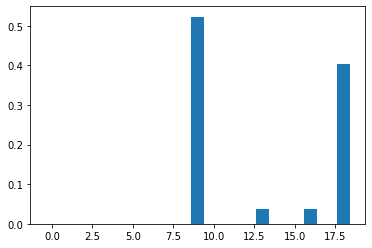

In [502]:
# Get feature (independent variables) importance
from matplotlib import pyplot
importance = BMCdataDT.feature_importances_
# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [503]:
CompResults = pd.DataFrame({'Deposit':y_test, 'Pred_Deposit':y_pred})
CompResults.head()

,Deposit,Pred_Deposit
36254,1,1
32662,0,0
40860,1,1
32897,0,0
16461,0,0


In [504]:
# Merge two Dataframes on index of both the dataframes

DSResults = x_test.merge(CompResults, left_index=True, right_index=True)
DSResults.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit,Pred_Deposit
36254,59,2,4,0,1,1,2,6,1,1460,...,999,0,0,-2.9,92.963,-40.8,1.266,5076.2,1,1
32662,34,2,2,0,0,0,2,5,1,248,...,999,1,1,-1.8,92.893,-46.2,1.299,5099.1,0,0
40860,32,2,4,0,1,0,2,10,3,275,...,999,0,0,-1.1,94.601,-49.5,0.959,4963.6,1,1
32897,53,2,3,0,1,1,2,5,1,186,...,999,1,1,-1.8,92.893,-46.2,1.299,5099.1,0,0
16461,24,1,2,0,1,0,1,7,3,184,...,999,0,0,1.4,93.918,-42.7,4.963,5228.1,0,0
